In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

In [6]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [10]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [11]:
!pip install textblob

In [13]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [16]:
# convert letters in Text into small letters and replacing any non-alphanumeric character into whitespace
df['Text']=df['Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['Text']=df['Text'].str.replace('[^\w\s]'," ")
df.Text.head(10)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price. there was a wide...
5    i got a wild hair for taffy and ordered this f...
6    this saltwater taffy had great flavors and was...
7    this taffy is so good. it is very soft and che...
8    right now i'm mostly just sprouting this so my...
9    this is a very healthy dog food. good for thei...
Name: Text, dtype: object

In [18]:
#removing stopwords
stopw=stopwords.words('english')
df['Text']=df['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stopw))
df.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object

In [ ]:
#perform spelling correction
df['Text']=df['Text'].apply(lambda x:str(TextBlob(x).correct()))
df.Text.head()

In [24]:
#perform lemmatization
df['Text']= df['Text'].apply(lambda x:" ".join(Word(word).lemmatize() for word in x.split()))
df.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object

In [27]:
!pip install wordcloud

In [29]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import seaborn as sns

In [31]:
df.Score.value_counts()


Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

<Axes: xlabel='Score', ylabel='count'>

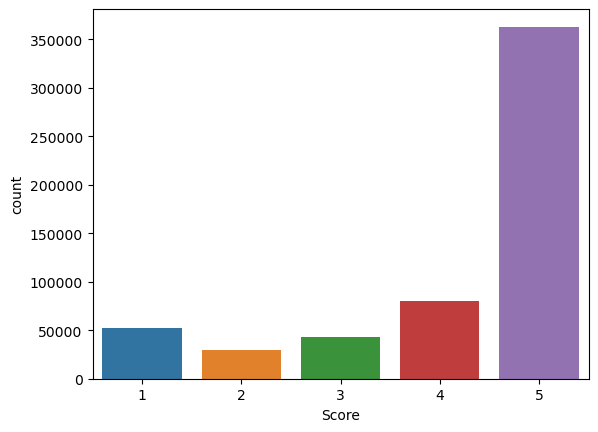

In [32]:
sns.countplot(data=df,x='Score')

In [33]:
reviews = df
reviews.dropna(inplace=True)

In [34]:
score1=reviews[reviews['Score']==1]
score2=reviews[reviews['Score']==2]
score3=reviews[reviews['Score']==3]
score4=reviews[reviews['Score']==4]
score5=reviews[reviews['Score']==5]

In [35]:
review_example=pd.concat([score1,score2,score3,score4,score5],axis=0)
review_example.reset_index(drop=True,inplace=True)
reviews_string=review_example.Summary.str.cat()
wordcloud=WordCloud(background_color='White').generate (reviews_string)

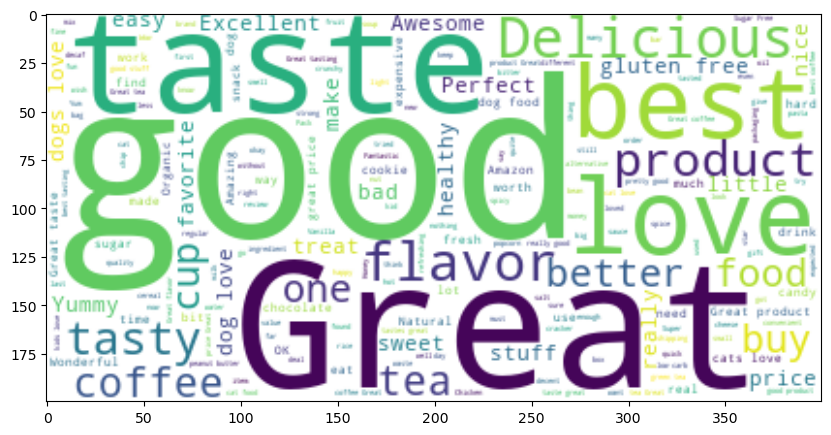

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis=("Off")
plt.show()

In [41]:
negative_reviews=review_example[review_example['Score'].isin ([1,2])]
positive_reviews=review_example[review_example['Score'].isin ([4,5])]
negativereviews_string=negative_reviews.Summary.str.cat()
positivereviews_string=positive_reviews.Summary.str.cat()
wordcloud_negative=WordCloud(background_color='black').generate(negativereviews_string)
wordcloud_positive=WordCloud(background_color='white').generate(positivereviews_string)

Text(0.5, 1.0, 'Negative Score Reviews')

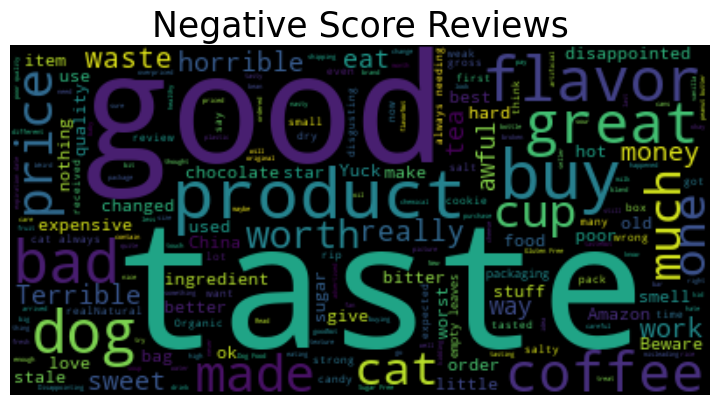

In [43]:
fig= plt.figure(figsize=(10,10))
ax1=fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title("Negative Score Reviews",fontsize=25)

Text(0.5, 1.0, 'Positive Score Reviews')

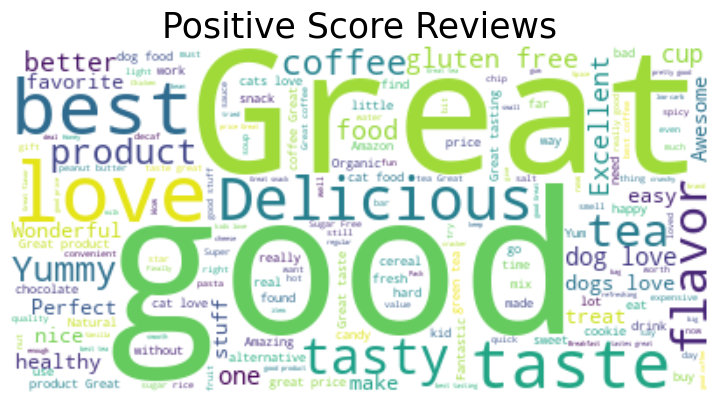

In [46]:
fig=plt.figure(figsize=(10,10))
ax2=fig.add_subplot(211)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title("Positive Score Reviews",fontsize=25)

In [47]:
!pip install vaderSentiment

In [48]:
import seaborn as sns
import re
import os
import sys
import ast

In [49]:
plt.style.use('fivethirtyeight')
cp=sns.color_palette()

In [50]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [51]:
empty_line=[]
for row in df['Text']:
     ps_score=analyzer.polarity_scores(row)
     empty_line.append(ps_score)
df_sentiments=pd.DataFrame(empty_line)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.123,0.608,0.268,0.8532
3,0.000,0.868,0.132,0.4404
4,0.000,0.369,0.631,0.9468


In [52]:
df_c=pd.concat([df.reset_index(drop=True),df_sentiments],axis=1)
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts.....,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries. light, pillowy ci...",0.123,0.608,0.268,0.8532
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.868,0.132,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price. wide assortment yummy...,0.000,0.369,0.631,0.9468


In [53]:
df_c['Sentiment']=np.where(df_c['compound']>=0,'Positive','Negative')
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts.....,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries. light, pillowy ci...",0.123,0.608,0.268,0.8532,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.868,0.132,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price. wide assortment yummy...,0.000,0.369,0.631,0.9468,Positive


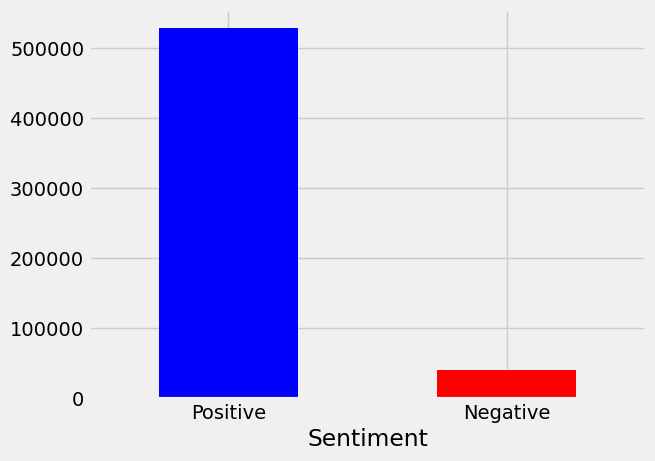

In [54]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar',rot=0,color=['blue','red']);